Import plotnine

In [0]:
from plotnine import *

Let's use mpg dataset from [plotnine.datasets](https://plotnine.readthedocs.io/en/stable/api.html#datasets)

In [0]:
from plotnine.data import mpg
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Let's do a scatterplot specifiying the 3 required elements of the grammar (data, aesthetic mapping and geometry) 

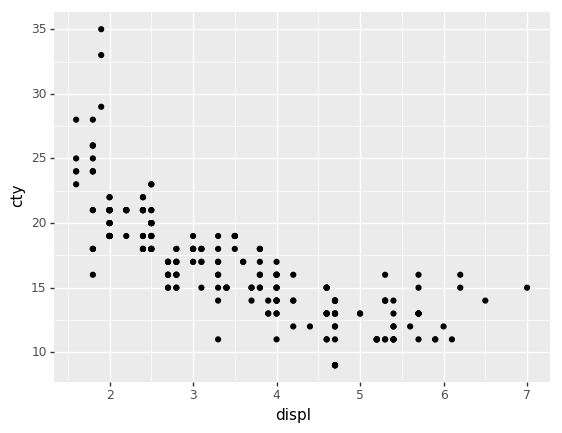

<ggplot: (8790866298316)>

In [0]:
(ggplot(mpg)  #data to use
 + aes(x='displ', y='cty')  # aesthetic mapping
 + geom_point() #geometry
)

Customizations and adding jitter!

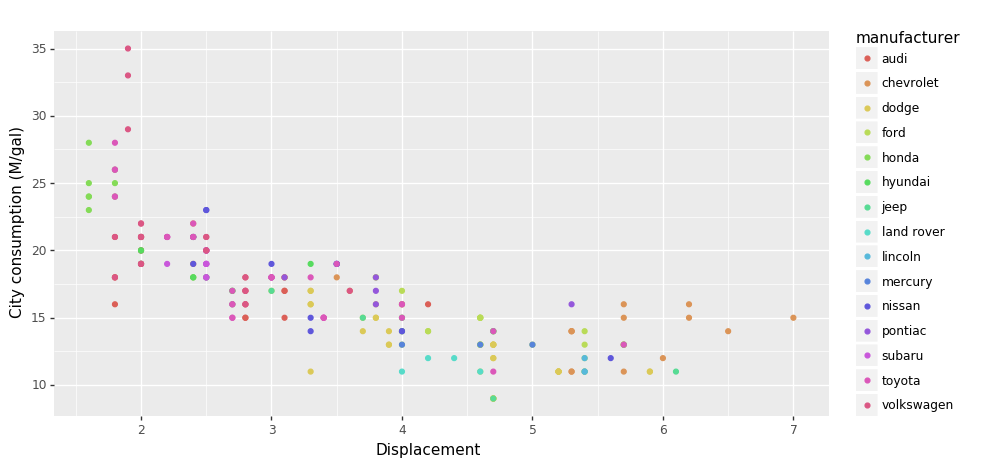

<ggplot: (-9223363245991862773)>

In [0]:
import plotnine.options as po
po.figure_size = (10, 5)

(ggplot(mpg)
 + aes(x='displ', y='cty', color='manufacturer')
 + geom_point()
 + xlab('Displacement')
 + ylab('City consumption (M/gal)')
# + geom_jitter()
)

Bar chart of counts per car manufacturer

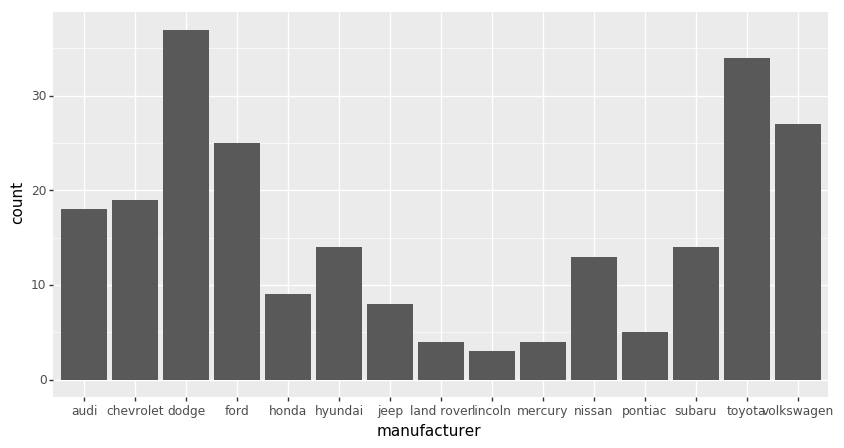

<ggplot: (-9223363245991858081)>

In [0]:
(ggplot(mpg)
 + aes(x='manufacturer')
 + geom_bar()
)

# 🧙the magic is in the geom_bar() stat!

In [0]:
?geom_bar

# 🤔 Exercise 1: 

In a new Colab notebook, use `plotnine` to create a scatterplot of the `iris` dataset showing `sepal lenght` vs. `sepal width` where the dots are colored by spieces. 

Can you find a way to deal with overplotting?

You will need to look at the help:

```
?geom_point
```



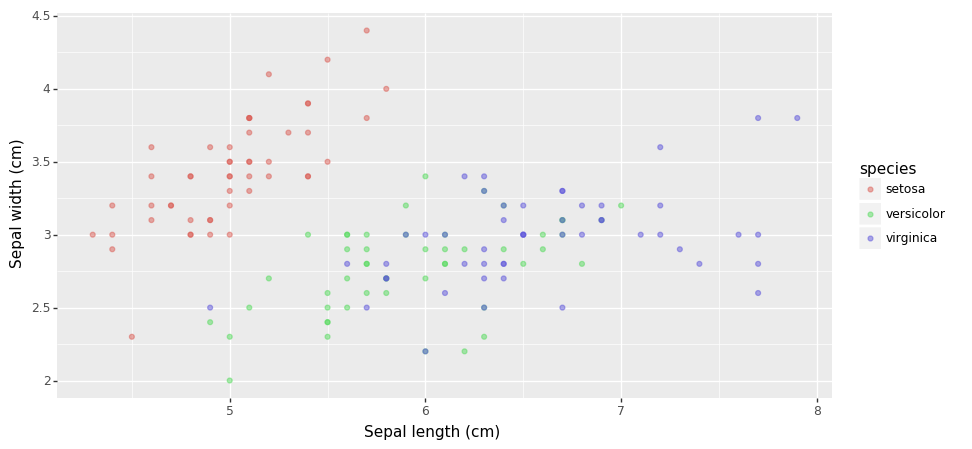

<ggplot: (-9223363245992163047)>

In [0]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()
(ggplot(iris)
 + aes(x='sepal_length', y='sepal_width', color='species')
 + geom_point(alpha=0.5)
 + xlab('Sepal length (cm)')
 + ylab('Sepal width (cm)')
)

# 🤔 Exercise 2: 

In a new Colab notebook, use `plotnine` to create a scatterplot of the `iris` dataset showing `sepal lenght` vs. `sepal width` and where dot radius depends on `petal length`. 

Can you find a way to deal with overplotting?

Hint: use the `size` aesthetic with `petal_lenght`

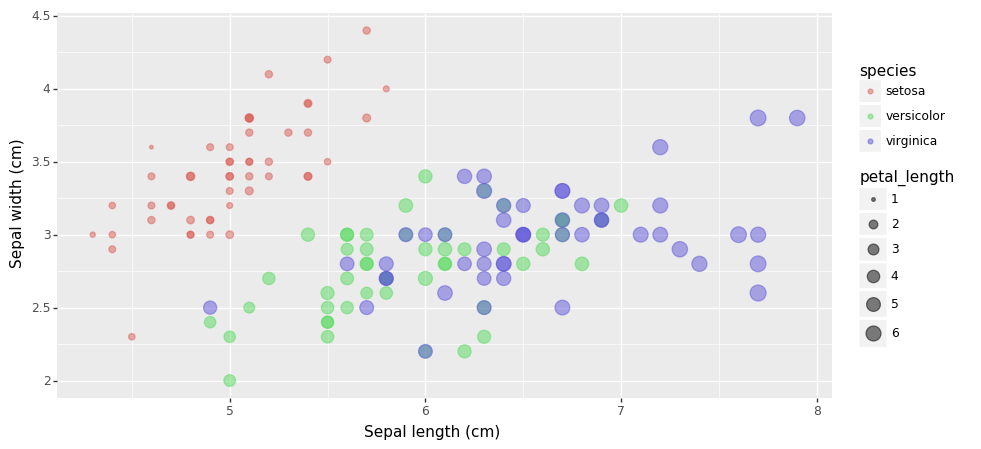

<ggplot: (-9223363245992158548)>

In [0]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()
(ggplot(iris)
 + aes(x='sepal_length', y='sepal_width', color='species', size='petal_length')
 + geom_point(alpha=0.5)
 + xlab('Sepal length (cm)')
 + ylab('Sepal width (cm)')
)

# 😖Exercise 3: 

In a new Colab notebook load `SMO-VOR-2015` and use `plotnine` to create a scatterplot of  the altitudes over time.

Can you deal with overplotting?

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


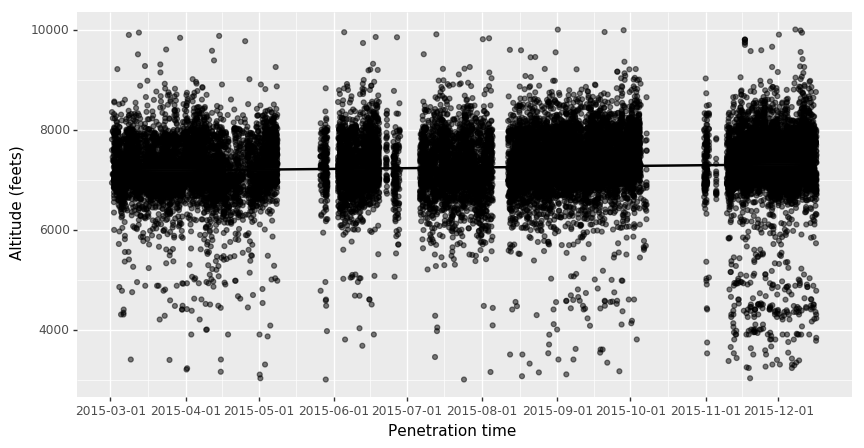

<ggplot: (-9223363245994606511)>

In [0]:
import pandas as pd  #import pandas
df = pd.read_csv('SMO-VOR-2015.csv')
df.head()

df.ptime = pd.to_datetime(df.ptime)

(ggplot(df)
 + aes(x='ptime', y='alt')
 + geom_point(alpha=0.5)
 + xlab('Penetration time')
 + ylab('Altitude (feets)')
 + geom_smooth(method='lm')
)

# 🤔Exercise 4: 

In a new Colab notebook load `SMO-VOR-2015` and use `plotnine` to create a scatterplot of the altitudes over time with a regression line and 95% confidence interval.

You can use `geom_smooth(method='lm')`

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be 

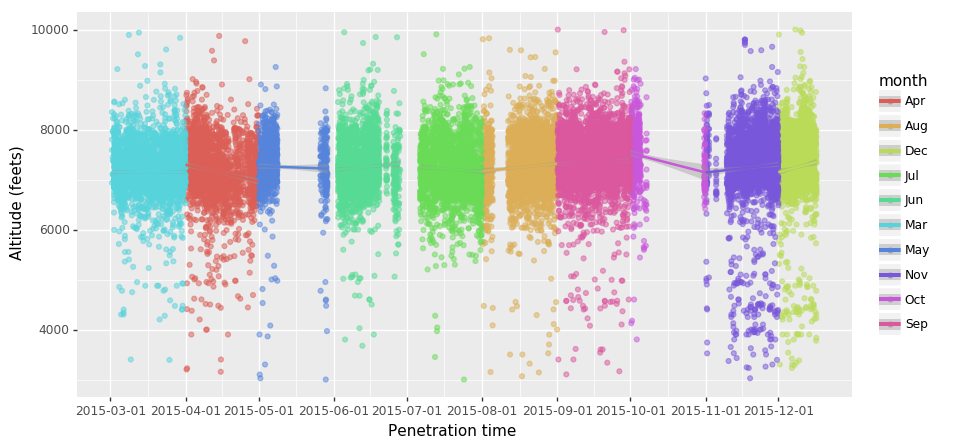

<ggplot: (-9223363245995632296)>

In [0]:
import pandas as pd  #import pandas
df = pd.read_csv('SMO-VOR-2015.csv')
df.head()

df.ptime = pd.to_datetime(df.ptime)

(ggplot(df)
 + aes(x='ptime', y='alt', color='month')
 + geom_point(alpha=0.5)
 + xlab('Penetration time')
 + ylab('Altitude (feets)')
 + geom_smooth(method='lm')
)

There are other alternatives using R magic or rpy2:

https://github.com/christianmerkwirth/colabs/blob/master/Rpy2.ipynb

In [0]:
%load_ext rpy2.ipython

In [0]:
%%R -h 400 -w 800
#The height of the figure is specified with "-h 300"
library(ggplot2)

df <- read.csv('SMO-VOR-2015.csv')
df$ptime <- as.POSIXct(df$ptime, tz="America/Los_Angeles")

ggplot(df, aes(x = ptime, y = alt, color = month)) +
  geom_point() + 
  stat_smooth(method='lm') +
  theme(legend.title = element_blank()) +
  labs(x = "Time", y = "Altitude (ft)", title = "Altitude over Time")

# 🤔Exercise 5: 

In a new Colab notebook load `SMO-VOR-2015` and use `plotnine` to create an histogram of the altitudes.

You will need to use  `geom_hist`

/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 136'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


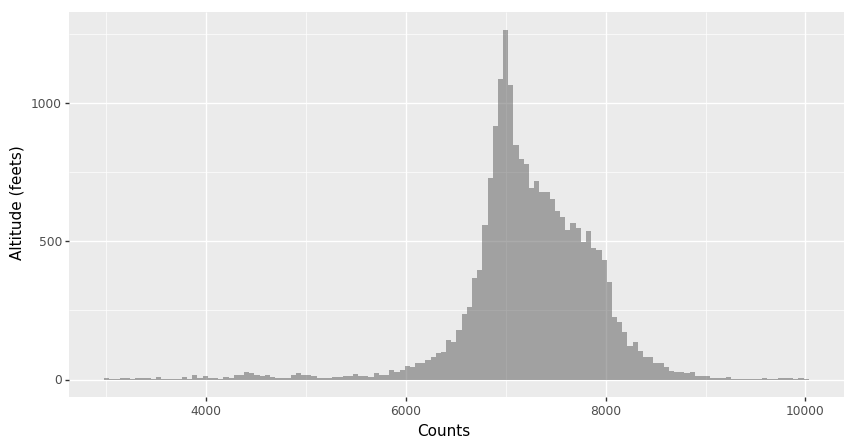

<ggplot: (-9223363245994771666)>

In [0]:
import pandas as pd  #import pandas
df = pd.read_csv('SMO-VOR-2015.csv')
df.head()

(ggplot(df)
 + aes(x='alt')
 + geom_histogram(alpha=0.5)
 + xlab('Counts')
 + ylab('Altitude (feets)')
)

# 🤔Exercise 6: 

In a new Colab notebook load `SMO-VOR-2015` and use `plotnine` to create an histograms of the altitudes for each month.

You can use  `facet_wrap('~month'))`

/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 136'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


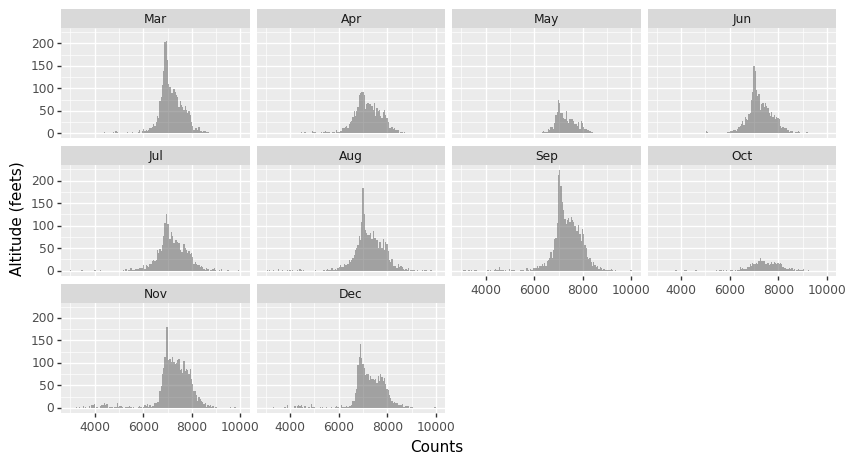

<ggplot: (-9223363245994991879)>

In [0]:
import pandas as pd  #import pandas
df = pd.read_csv('SMO-VOR-2015.csv')
df.head()

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df.month = pd.Categorical(df.month, categories=months, ordered=True)

(ggplot(df)
 + aes(x='alt')
 + geom_histogram(alpha=0.5)
 + xlab('Counts')
 + ylab('Altitude (feets)')
 + facet_wrap('~month')
)

# 🤔Exercise 7: 

In a new Colab notebook load `SMO-VOR-2015` and use `plotnine` to create an boxplot of the altitudes.

You can use  `geom_boxplot`

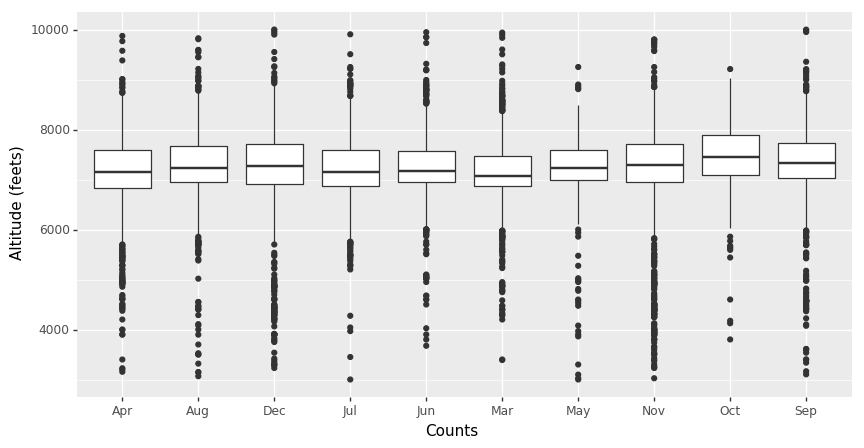

<ggplot: (-9223363245995455726)>

In [0]:
import pandas as pd  #import pandas
df = pd.read_csv('SMO-VOR-2015.csv')
df.head()

(ggplot(df)
 + aes(x='month', y='alt')
 + geom_boxplot()
 + xlab('Counts')
 + ylab('Altitude (feets)')
)